In [1]:
# TO USE IN PAPER
# analysis of feature importance for viability prediction in tubes / blasts, CellProfiler/Harmony, 
# 26/10/2023, Roman Lambert
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

onedrive_path = "C:/Users/lambr/OneDrive - National University of Ireland, Galway/"

# feature importances from RF models
#path = onedrive_path + "CellProfiler\\Blasts\\importance_df.csv"
path = onedrive_path + "ViabilityPred-models\\Harmony\\Blasts\\importance_df.csv"
#path = onedrive_path + "ViabilityPred-models\\Harmony\\Tubes\\importance_df.csv"

importance_df = pd.read_csv(path, index_col=0)
importance_df.head()

,Cell 33342 Radial Mean,Cell 33342 Radial Mean Ratio SER-Bright,Cell 33342 Radial Mean Ratio SER-Dark,Cell 33342 Radial Mean Ratio SER-Hole,Cell 33342 Radial Relative Deviation SER-Dark,Cell 33342 Radial Relative Deviation SER-Hole,Cell 488 Axial Length Ratio,Cell 488 Axial Length Ratio SER-Bright,Cell 488 Axial Length Ratio SER-Dark,Cell 488 Radial Mean Ratio SER-Bright,...,Nucleus Mito Profile 5/5 SER-Dark,Nucleus Mito Profile 5/5 SER-Hole,Nucleus Mito Profile 5/5 SER-Saddle,Nucleus Width [µm],Ring Region Alexa 488 SER Bright 0 px,Ring Region Alexa 488 SER Dark 0 px,Ring Region Alexa 488 SER Saddle 0 px,Ring Region Alexa 647 SER Bright 0 px,Ring Region Alexa 647 SER Dark 0 px,Ring Region Alexa 647 SER Hole 0 px
NCAP,0.002132,0.001084,0.080699,0.020221,0.000476,7.679680e-03,0.002880,1.438133e-03,2.644322e-03,0.012201,...,3.457775e-04,2.980966e-04,6.723604e-04,0.001430,0.001460,0.004169,0.001394,0.000817,1.478272e-04,0.000853
ATOR,0.016815,0.009030,0.000824,0.005102,0.026072,1.732542e-05,0.000007,7.666867e-06,3.855783e-06,0.017078,...,4.969729e-06,5.186137e-06,2.496142e-06,0.000078,0.008251,0.000703,0.009182,0.000007,9.142231e-18,0.004991
CERI,0.000214,0.000119,0.000011,0.001237,0.001110,8.238367e-18,0.000000,5.798372e-18,1.925053e-19,0.000195,...,7.392858e-18,6.479111e-20,6.333862e-07,0.002930,0.000026,0.000134,0.000337,0.000224,2.125160e-20,0.000001
CLOF,0.000379,0.001459,0.001250,0.003368,0.001219,7.449322e-04,0.001137,3.606348e-03,2.387139e-03,0.006485,...,5.829646e-03,2.491714e-03,7.126712e-03,0.000419,0.000464,0.000336,0.003511,0.000829,1.406368e-03,0.000265
COLC,0.014861,0.013557,0.000030,0.000103,0.004605,2.653465e-05,0.000154,5.326079e-03,3.230103e-05,0.015932,...,1.102978e-03,3.655330e-04,7.343757e-05,0.000235,0.000014,0.000101,0.000383,0.000084,1.849633e-04,0.000124


In [2]:
import_df_T = importance_df.T.copy()
# keep only the 10 largest values per column, and class the features by their importance
import_df_T = import_df_T.apply(lambda s, n: pd.Series(s.nlargest(n).index), axis=0, n=20)
# count the number of times a feature is in the top 10 of the whole dataset
import_df_T = import_df_T.apply(pd.value_counts)
import_df_T.fillna(0, inplace=True)
importance_sums_df = pd.DataFrame(import_df_T.sum(axis=1), index= import_df_T.index, columns=['Top20Frequency']).sort_values(by=['Top20Frequency'], ascending=False)
importance_sums_df

C:\Users\lambr\AppData\Local\Temp\ipykernel_16324\757902567.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  import_df_T = import_df_T.apply(pd.value_counts)
C:\Users\lambr\AppData\Local\Temp\ipykernel_16324\757902567.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  import_df_T = import_df_T.apply(pd.value_counts)
C:\Users\lambr\AppData\Local\Temp\ipykernel_16324\757902567.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  import_df_T = import_df_T.apply(pd.value_counts)
C:\Users\lambr\AppData\Local\Temp\ipykernel_16324\757902567.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  import_df_T = import_df_T.apply(pd.value_counts)


,Top20Frequency
Intensity Nucleus Alexa 555 Mean,10.0
Cell Contact Area with Neighbors [%],9.0
Cell 488 Radial Mean Ratio SER-Dark,9.0
Cytoplasm 33342 Profile 3/5 SER-Spot,9.0
Nucleus Alexa 555 SER Dark 0 px,8.0
...,...
Cell 555 Symmetry 05,1.0
Cytoplasm 33342 Profile 5/5 SER-Saddle,1.0
Cytoplasm 33342 Profile 5/5 SER-Dark,1.0
Cell 568 Symmetry 03 SER-Dark,1.0


In [3]:

from matplotlib.colors import LinearSegmentedColormap

#clustermap of binary top 20 feature importance
import_df_T['Top20Frequency'] = importance_sums_df['Top20Frequency']
import_df_T = import_df_T.sort_values(by=['Top20Frequency'], ascending=False).drop(columns=['Top20Frequency'])


In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#scale = StandardScaler()
scale = MinMaxScaler()
scale = None

# feature importances from RF models
if scale is not None:
    scaled_importance = scale.fit_transform(importance_df.T)
    scaled_importance = pd.DataFrame(scaled_importance, index=importance_df.T.index, columns=importance_df.T.columns)
else:    
    scaled_importance = importance_df.T.copy()
    scaled_importance = pd.DataFrame(scaled_importance, index=importance_df.T.index, columns=importance_df.T.columns)
scaled_importance_rank = scaled_importance.rank(axis=0, ascending=False).median(axis=1).sort_values(ascending=True)
scaled_importance['sum_of_scaled_importances'] = scaled_importance.sum(axis=1)

pd.DataFrame(scaled_importance_rank, columns=['median_rank'])
scaled_importance['median_rank'] = scaled_importance_rank
scaled_importance.sort_values(by=['median_rank'], ascending=True)
scaled_importance['top_20_frequency'] = importance_sums_df['Top20Frequency']
scaled_importance.fillna(0, inplace=True)
scaled_importance.head(5)


,NCAP,ATOR,CERI,CLOF,COLC,DAPT,DEXA,DOXO,EZET,HYCQ,...,WURS,CISP,IMAT,OLAN,SUNI,TEBU,ZIDO,sum_of_scaled_importances,median_rank,top_20_frequency
Cell 33342 Radial Mean,0.002132,0.016815,0.000214,0.000379,0.014861,0.001222,0.002412,0.000037,0.014110,0.001635,...,0.024451,0.003592,1.301304e-06,0.000222,2.073840e-05,0.000411,0.000236,0.135838,104.5,4.0
Cell 33342 Radial Mean Ratio SER-Bright,0.001084,0.009030,0.000119,0.001459,0.013557,0.000111,0.000303,0.000005,0.000299,0.001036,...,0.000726,0.031523,5.775451e-04,0.000050,1.325598e-05,0.146592,0.011102,0.322675,144.0,5.0
Cell 33342 Radial Mean Ratio SER-Dark,0.080699,0.000824,0.000011,0.001250,0.000030,0.037244,0.012948,0.002664,0.002967,0.002753,...,0.000082,0.000151,5.886566e-07,0.000642,1.776438e-06,0.001773,0.000135,0.172748,128.5,4.0
Cell 33342 Radial Mean Ratio SER-Hole,0.020221,0.005102,0.001237,0.003368,0.000103,0.007811,0.000075,0.000307,0.000749,0.000008,...,0.001020,0.007525,3.734312e-06,0.000369,5.906255e-08,0.009333,0.000095,0.255698,107.0,5.0
Cell 33342 Radial Relative Deviation SER-Dark,0.000476,0.026072,0.001110,0.001219,0.004605,0.087742,0.005353,0.000018,0.001917,0.007183,...,0.001185,0.000025,2.146549e-07,0.000068,3.469360e-06,0.000010,0.000420,0.167071,114.5,3.0


In [5]:
# scatter plot of median rank vs sum of scaled importance
import plotly.express as px
fig = px.scatter(scaled_importance, x="median_rank", y="sum_of_scaled_importances", hover_name=scaled_importance.index, color="top_20_frequency", size_max=10, width=900, height=800, title="Sum of feature importances against median ranks for individual RF models", color_continuous_scale='viridis_r')
fig.update_xaxes(title_text='Median rank')
fig.update_yaxes(title_text='Sum of scaled importance')
fig.update_coloraxes(colorbar_title="Top 20 frequency", colorbar_len=0.7, colorbar_thickness=20 , colorbar_tickmode='array')
fig.show()
# a feature is more important if it has a low median rank and a high sum of scaled importance


In [6]:
scaled_importance_clean = scaled_importance.copy().sort_values(by=['sum_of_scaled_importances'], ascending=False)

mask = scaled_importance_clean.mask(scaled_importance_clean['sum_of_scaled_importances'] < scaled_importance_clean['sum_of_scaled_importances'].quantile(0.5), True)
mask = mask.mask(mask['median_rank'] > mask['median_rank'].quantile(0.5), False).drop(columns=['median_rank', 'sum_of_scaled_importances', 'top_20_frequency'])
mask

,NCAP,ATOR,CERI,CLOF,COLC,DAPT,DEXA,DOXO,EZET,HYCQ,...,NELA,SIMV,VORI,WURS,CISP,IMAT,OLAN,SUNI,TEBU,ZIDO
Intensity Nucleus Alexa 555 Mean,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Cytoplasm 488 Profile 2/5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Cell 555 Threshold Compactness 60%,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Cytoplasm 488 Profile 3/5 SER-Hole,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Intensity Nucleus HOECHST 33342 Mean,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nucleus Mito Profile 5/5 SER-Dark,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Nucleus 33342 Threshold Compactness 60% SER-Valley,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Cytoplasm Alexa 647 SER Bright 0 px,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Nucleus 33342 Threshold Compactness 60% SER-Dark,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


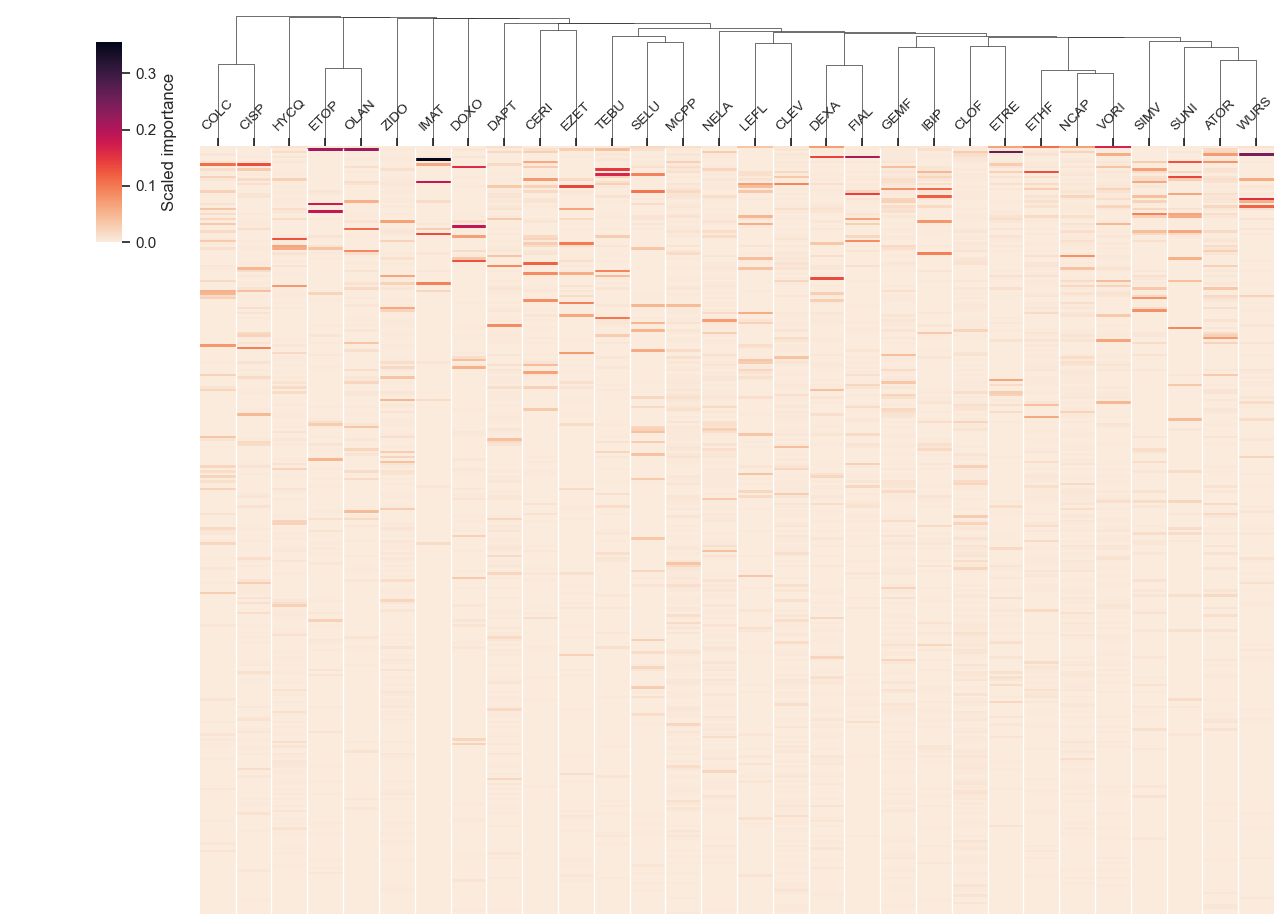

In [10]:

scaled_importance_clean.drop(columns=['median_rank', 'top_20_frequency', 'sum_of_scaled_importances'], inplace=True, errors='ignore')


#clustermap of scaled feature importance
sns.set(font_scale=1)

cm = sns.clustermap(scaled_importance_clean, 
                    cmap= "rocket_r", figsize=(13, 10), 
                    annot=False, fmt='g', 
                    xticklabels=1, yticklabels=False, 
                    row_cluster=False, col_cluster=True,
                    dendrogram_ratio=0.15,linewidths=0.00, 
                    metric='correlation', method='single',
                    cbar_kws={"label": "Scaled importance", "orientation": "vertical"}, 
                    cbar_pos=(0.08, 0.75, 0.02, 0.2))

cm.tick_params(axis='x',labelsize=10, rotation=45)
cm.ax_heatmap.xaxis.tick_top()
cm.ax_heatmap.vlines(range(1,len(scaled_importance_clean.columns)), 1,ymax=len(scaled_importance_clean.index), colors='white', linewidth=1)


# SCALED IMPORTANCES

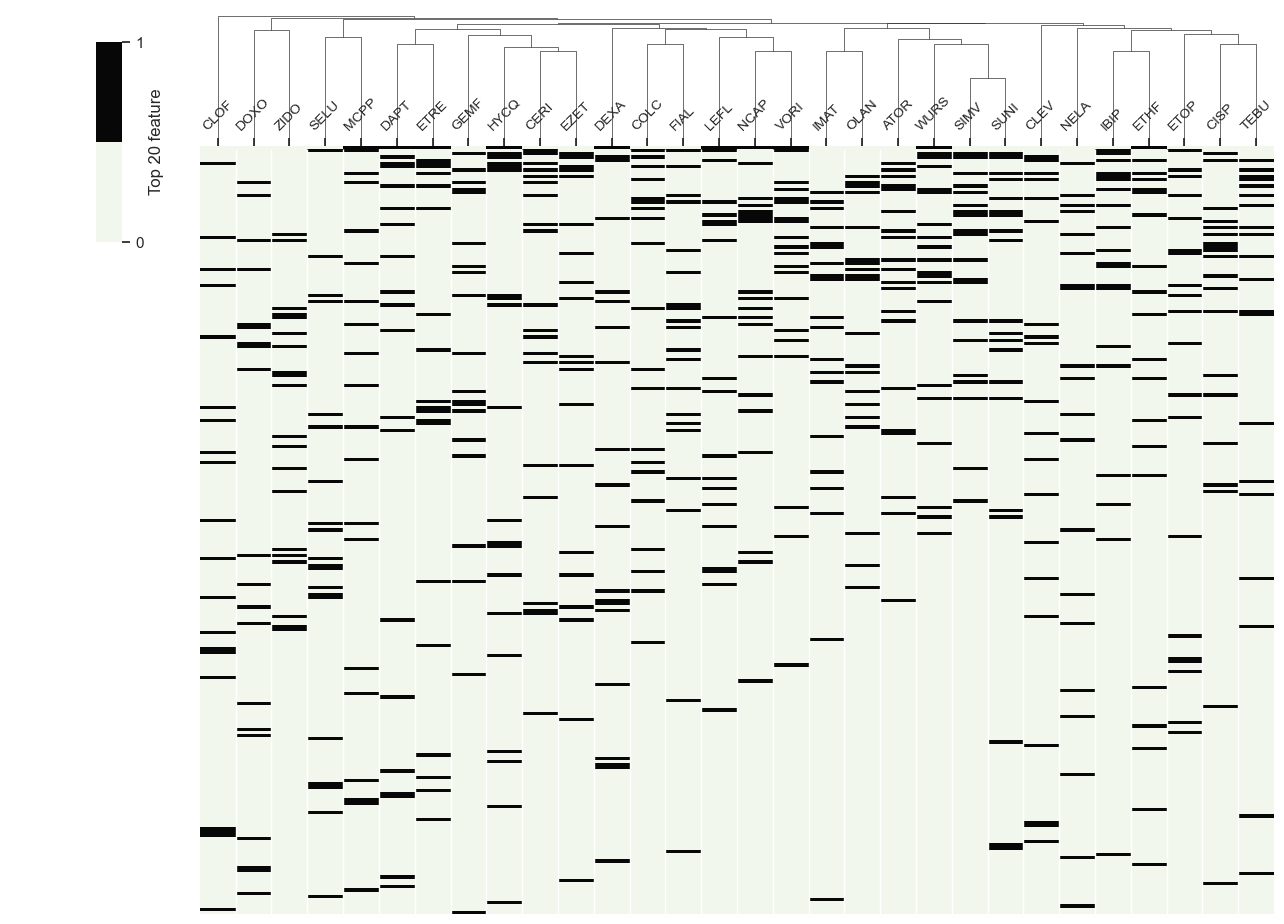

In [9]:
colors = ['#F1F7ED','#070707']
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))
cm2 = sns.clustermap(import_df_T, cmap= cmap, annot=False, row_cluster=False, dendrogram_ratio=0.15,figsize=(13, 10), metric='cityblock', vmin=0, vmax=1, cbar_kws={"ticks":[False,True], "label": "Top 20 feature", "orientation": "vertical", "shrink": 0.2, "pad": 0.05},linewidths=0.0, cbar_pos=(0.08, 0.75, 0.02, 0.2), xticklabels=1, yticklabels=0)
cm2.tick_params(axis='x',labelsize=10, rotation=45)
cm2.ax_heatmap.xaxis.tick_top()
cm2.ax_heatmap.vlines(range(1,len(scaled_importance_clean.columns)), 1,ymax=len(scaled_importance_clean.index), colors='white', linewidth=1)

# TOP 20 FEATURES PER MODEL